# Efficient Frontier

In [116]:
import pandas as pd, numpy as np
import edhec_risk_kit as erk
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
ind = erk.get_ind_returns()
ind.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348
2018-12,-0.0973,-0.0969,-0.1580,-0.0824,-0.1535,-0.0557,-0.0728,-0.0840,-0.0776,-0.1009,...,-0.0884,-0.0765,-0.0923,-0.0863,-0.1519,-0.1121,-0.0919,-0.0628,-0.1144,-0.0693


In [40]:
cols_of_interest = ["Food", "Smoke", "Coal", "Beer", "Fin"]
erk.var_gaussian(ind[cols_of_interest], modified=True)

Food     0.064036
Smoke    0.083784
Coal     0.053557
Beer     0.038017
Fin      0.079208
dtype: float64

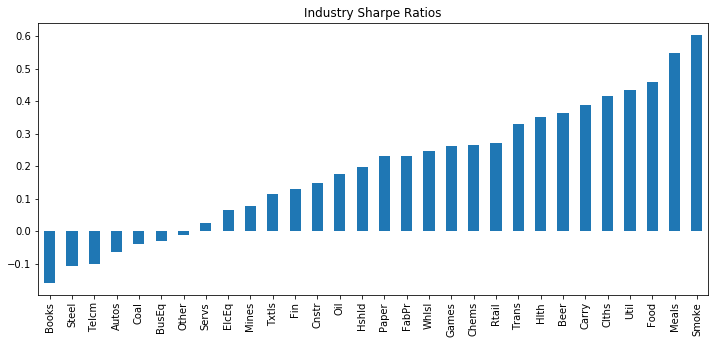

In [45]:
erk.sharpe_ratio(ind["2000":],0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios", figsize=(12,5))

# Efficient Frontier Part 2

In [58]:
er = erk.annualized_ret(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

In [89]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
vol = erk.portfolio_vol(w15, cov.loc[l,l])
vol, w15

(0.056163669406706564, array([0.47287631, 0.52712369]))

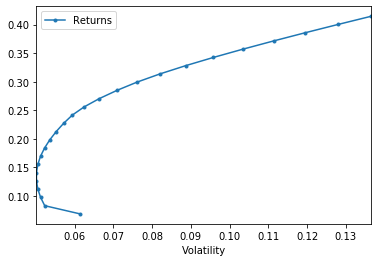

In [100]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l,l])

# Find maximum Sharpe portfolio and gmv

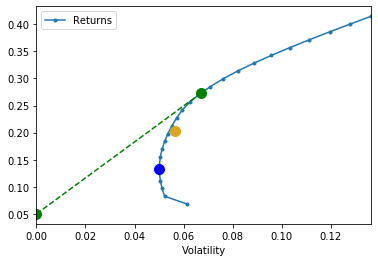

In [113]:
erk.plot_ef(25, er[l], cov.loc[l,l], show_cml=True, riskfree_rate=0.05, show_ew=True, show_gmv=True)

<BarContainer object of 30 artists>

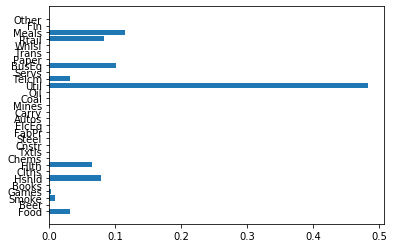

In [125]:
plt.barh(er.index, erk.gmv(cov))

# Quiz 2

In [131]:
ret = erk.get_hfi_returns()

In [132]:
erk.var_gaussian(ret["2000":],1)

Convertible Arbitrage     0.034845
CTA Global                0.050336
Distressed Securities     0.031430
Emerging Markets          0.058070
Equity Market Neutral     0.014772
Event Driven              0.030853
Fixed Income Arbitrage    0.019519
Global Macro              0.024619
Long/Short Equity         0.039420
Merger Arbitrage          0.015355
Relative Value            0.021605
Short Selling             0.102130
Funds Of Funds            0.029385
dtype: float64

In [187]:
erk.var_gaussian(ret["2000":],1,modified=True)

Convertible Arbitrage     0.105193
CTA Global                0.046750
Distressed Securities     0.050049
Emerging Markets          0.087398
Equity Market Neutral     0.042024
Event Driven              0.046032
Fixed Income Arbitrage    0.067639
Global Macro              0.022878
Long/Short Equity         0.051668
Merger Arbitrage          0.021410
Relative Value            0.049557
Short Selling             0.098758
Funds Of Funds            0.049227
dtype: float64

In [177]:
erk.var_historic(ret["2000":], 1)

Convertible Arbitrage     0.031674
CTA Global                0.050938
Distressed Securities     0.042642
Emerging Markets          0.065496
Equity Market Neutral     0.019800
Event Driven              0.038540
Fixed Income Arbitrage    0.030748
Global Macro              0.022632
Long/Short Equity         0.045060
Merger Arbitrage          0.022654
Relative Value            0.021788
Short Selling             0.107684
Funds Of Funds            0.027200
Name: 0.01, dtype: float64

In [180]:
ind = erk.get_ind_returns()
l = ['Books', 'Steel', 'Oil', 'Mines']
rf = 0.1

In [181]:
cov = ind["2013":"2017"].cov()
er = erk.annualized_ret(ind["2013":"2017"], 12)

In [168]:
1/len(l)

0.25

In [184]:
cov.loc[l,l]

,Books,Steel,Oil,Mines
Books,0.002720,0.001940,0.001637,0.001539
Steel,0.001940,0.004391,0.002122,0.003391
Oil,0.001637,0.002122,0.002697,0.002179
Mines,0.001539,0.003391,0.002179,0.005232


In [183]:
er[l]

Books    0.095312
Steel    0.100716
Oil      0.025275
Mines    0.005136
dtype: float64

In [185]:
w_msr = pd.Series(erk.msr(0.1, er[l], cov.loc[l,l]), index=er[l].index)
w_msr.sort_values()

Mines    0.000000e+00
Oil      1.405126e-16
Books    4.513750e-15
Steel    1.000000e+00
dtype: float64

In [186]:
w_gmv = pd.Series(erk.gmv(cov.loc[l,l]), index=er[l].index)
w_gmv.sort_values()*100

Steel    4.336809e-17
Mines    8.886311e+00
Oil      4.341120e+01
Books    4.770249e+01
dtype: float64

In [174]:
erk.portfolio_vol(w_msr, ind["2018"][l].cov())

0.06346230747220709

In [175]:
# Q11
erk.portfolio_vol(w_msr, ind["2018"][l].cov())*(12**0.5)

0.21983988181484135

In [176]:
# Q12
erk.portfolio_vol(w_gmv, ind["2018"][l].cov())*(12**0.5)

0.18973734511535803